# Load Classfier

In [1]:
# Importing the libraries
import numpy as np
import re
import pickle 
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/uzaycetin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Using our classifier
with open('mytfidfmodel.pickle','rb') as f:
    tfidf = pickle.load(f)
    
with open('myclassifier.pickle','rb') as f:
    clf = pickle.load(f)
    

# Test on a new Data

In [35]:
sample = ["You are a nice person man, have a good life"]
sample = tfidf.transform(sample).toarray()
sentiment = clf.predict(sample)
sentiment

array([1])

In [8]:
sample = ["Logistic regression is not good! "]
sample = tfidf.transform(sample).toarray()
sentiment = clf.predict(sample)
sentiment

array([1])

# Test on Twitter

In [9]:
import json
import tweepy
import time
from tweepy import OAuthHandler


consumer_key = 'yoIwFkjZGYDa49aO16XqSNqcN'
consumer_secret = 'gl4LQOItV7Z1aFwNrlvaiKJ3t8o8h99blMIAmnmdHxYjzjRAxO' 
access_token = '624310916-E7fDF2IE8P6bfY1oVFglASf6F8RnxMd3vgSXFqnZ'
access_token_secret ='ID9JcoXHsDcKtvNcnmBGcCQhUlO0wmwAxBJ6LCesiUAas'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
 
#api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, retry_count=3, retry_delay=60)

In [10]:
# Creates the user object. The me() method returns the user whose authentication keys were used.
user = api.me()
 
print('Name: ' + user.name)
print('ID: ' + str(user.id))
print('Location: ' + user.location)

Name: Bijoyan Das
ID: 624310916
Location: Calcutta, India


In [11]:
args = ['Khashoggi'];
api = tweepy.API(auth,timeout=10)

# Fetching the tweets
list_tweets = []

query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang='en',result_type='recent',geocode="22.1568,89.4332,500km").items(100):
        list_tweets.append(status.text)

In [21]:
list_tweets[:4]

['UN official: Khashoggi was victim of an extrajudicial execution https://t.co/vDwybMc1NH',
 'UN official: Khashoggi was victim of an extrajudicial execution @AJENews  https://t.co/EPJpBk8m5I',
 'Reticence of western firms in wake of Khashoggi killing drives Russia and Saudi Arabia closer https://t.co/G3ueqUaCg3 via @TheNationalUAE',
 'After Alif Laila (One Thousand and One Nights, also known as the Arabian Nights) this Jamal bin Ahmad Khashoggi Mur… https://t.co/PegtLy0nvO']

In [22]:
mapping = {0:'positive', 1:'negative'}

# Twitter Data Claening

In [23]:
# Preprocessing the tweets

sent_tweets = []
for tweet in list_tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    
    sent = clf.predict(tfidf.transform([tweet]).toarray())
    sent_tweets.append((tweet, mapping[int(sent)]))

sent_tweets[:4]

[('un official khashoggi was victim of an extrajudicial execution ',
  'positive'),
 ('un official khashoggi was victim of an extrajudicial execution ajenews ',
  'positive'),
 ('reticence of western firms in wake of khashoggi killing drives russia and saudi arabia closer via thenationaluae',
  'positive'),
 ('after alif laila one thousand and one nights also known as the arabian nights this jamal bin ahmad khashoggi mur ',
  'negative')]

## Positive/negative Split

In [28]:
pos = len([s for t, s in sent_tweets if s == 'positive'])
neg = len(sent_tweets) - pos
pos, neg

(36, 64)

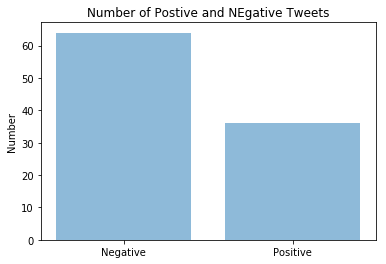

In [29]:
# Visualizing the results
import matplotlib.pyplot as plt
import numpy as np
plt.bar(['Positive','Negative'], [pos, neg], alpha = 0.5)
#plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Postive and NEgative Tweets')

plt.show()

In [30]:
sample = ["You are a nice person man, have a good life"]
sample = tfidf.transform(sample).toarray()
sentiment = clf.predict(sample)
sentiment

array([1])

In [34]:
from textblob import TextBlob

In [35]:
sample = ["You are a nice person man, have a good life"]
blob = TextBlob(sample[0])

In [36]:
blob.translate(to="tr")

TextBlob("Sen iyi bir insansın, iyi bir hayatın var")

In [53]:
sample = []
yorum = "Kampanya berbat. kötü ya!"
blob = TextBlob(yorum)
sample.append(str(blob.translate(to="en")))

In [54]:
print(sample)

['The campaign sucks. bad either!']


In [55]:
sample = tfidf.transform(sample).toarray()
sentiment = clf.predict(sample)
sentiment

array([0])